In [ ]:
import cv2
import numpy as np
from scipy import signal, interpolate
import math

In [ ]:
def solution(image_path):

 no_flash_image=cv2.imread(image_path)


 flash_image=cv2.imread(image_path)


In [ ]:
 imgYCC1 = cv2.cvtColor(flash_image, cv2.COLOR_BGR2YCR_CB)
 Y1, Cr1, Cb1 = cv2.split(imgYCC1)
 imghsv1=cv2.cvtColor(no_flash_image, cv2.COLOR_BGR2HSV)
 h1,s1,v1=cv2.split(imghsv1)
 b1,g1,r1 = cv2.split(flash_image)
 imgYCC2 = cv2.cvtColor(no_flash_image, cv2.COLOR_BGR2YCR_CB)
 Y2, Cr2, Cb2 = cv2.split(imgYCC2)
 b2,g2,r2 = cv2.split(no_flash_image)

NameError: ignored

In [ ]:
from scipy.ndimage import gaussian_filter

def bilateral_filter(image, sigma_space, sigma_color):
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Adjust indices to ensure they are within the valid range
            i_min = max(0, i - sigma_space)
            i_max = min(image.shape[0] - 1, i + sigma_space + 1)
            j_min = max(0, j - sigma_space)
            j_max = min(image.shape[1] - 1, j + sigma_space + 1)

            # Create 2D arrays for spatial weights using vectorized function
            m, n = np.meshgrid(np.arange(i_min - i, i_max - i), np.arange(j_min - j, j_max - j))
            spatial_weights = np.exp(-(m*2 + n*2) / (2 * sigma_space*2))

            # Extract the neighborhood
            neighborhood = image[i_min:i_max, j_min:j_max]

            # Calculate the range weights using vectorized function
            intensity_diff = neighborhood - image[i, j]
            range_weights = np.exp(-(intensity_diff*2) / (2 * sigma_color*2))

            # Transpose one of the arrays to match shapes for element-wise multiplication
            weights = spatial_weights * range_weights.T

            # Normalize the weights
            normalized_weights = weights / np.sum(weights)

            # Compute the weighted average
            filtered_image[i, j] = np.sum(normalized_weights * neighborhood.T)

    return filtered_image

In [ ]:
    Yf=bilateral_filter(Y2,20,2)
    Yff=Y1-Yf
    Yfff=Y2+Yff

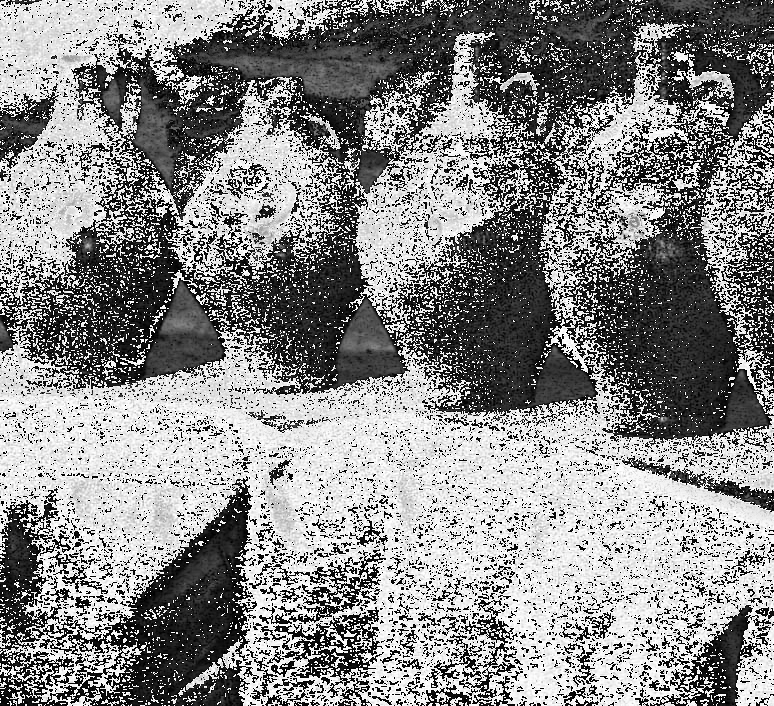

In [ ]:
    out=cv2.merge((Yf,Cb1,Cr1))
    final=cv2.cvtColor(out,cv2.COLOR_YCR_CB2RGB )

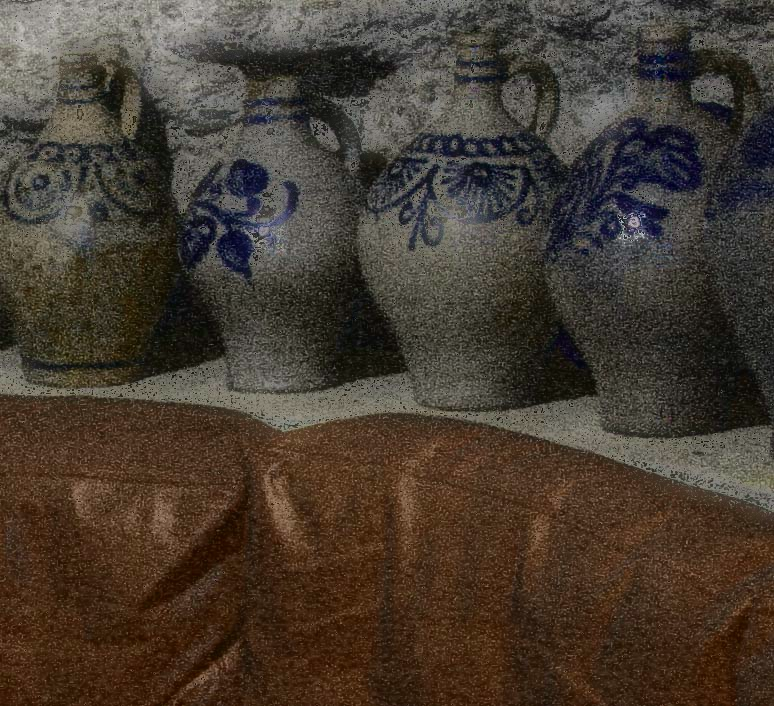

In [ ]:
    return(final)